In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohankrishnathalla/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

z:\py\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Andrjusha\.cache\kagglehub\datasets\mohankrishnathalla\diabetes-health-indicators-dataset\versions\1


In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Задание 1

Выбрать и загрузить любой датасет из репозитория UCI (https://archive.ics.uci.edu/datasets) (можно взять из любого другого источника). Очень желательно, чтобы количество наблюдений в датасете было больше 1к. Проанализировать выбранный датасет (например, кол-во признаков с пропущенными значениями, кол-во категориальных признаков, распределение признаков/таргета и т.д.). Построить, визуализировать и оценить дерево решений (для хорошей визуализации можно рассмотреть дерево глубины 3);

In [7]:
data = pd.read_csv(os.path.join(path, 'diabetes_dataset.csv'))
data

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [8]:
X = data.drop(['diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes'], axis=1)
y = data['diabetes_stage']

Количество наблюдений: 100000
Количество признаков: 28
Пропущенные значения по признакам:
 age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol              

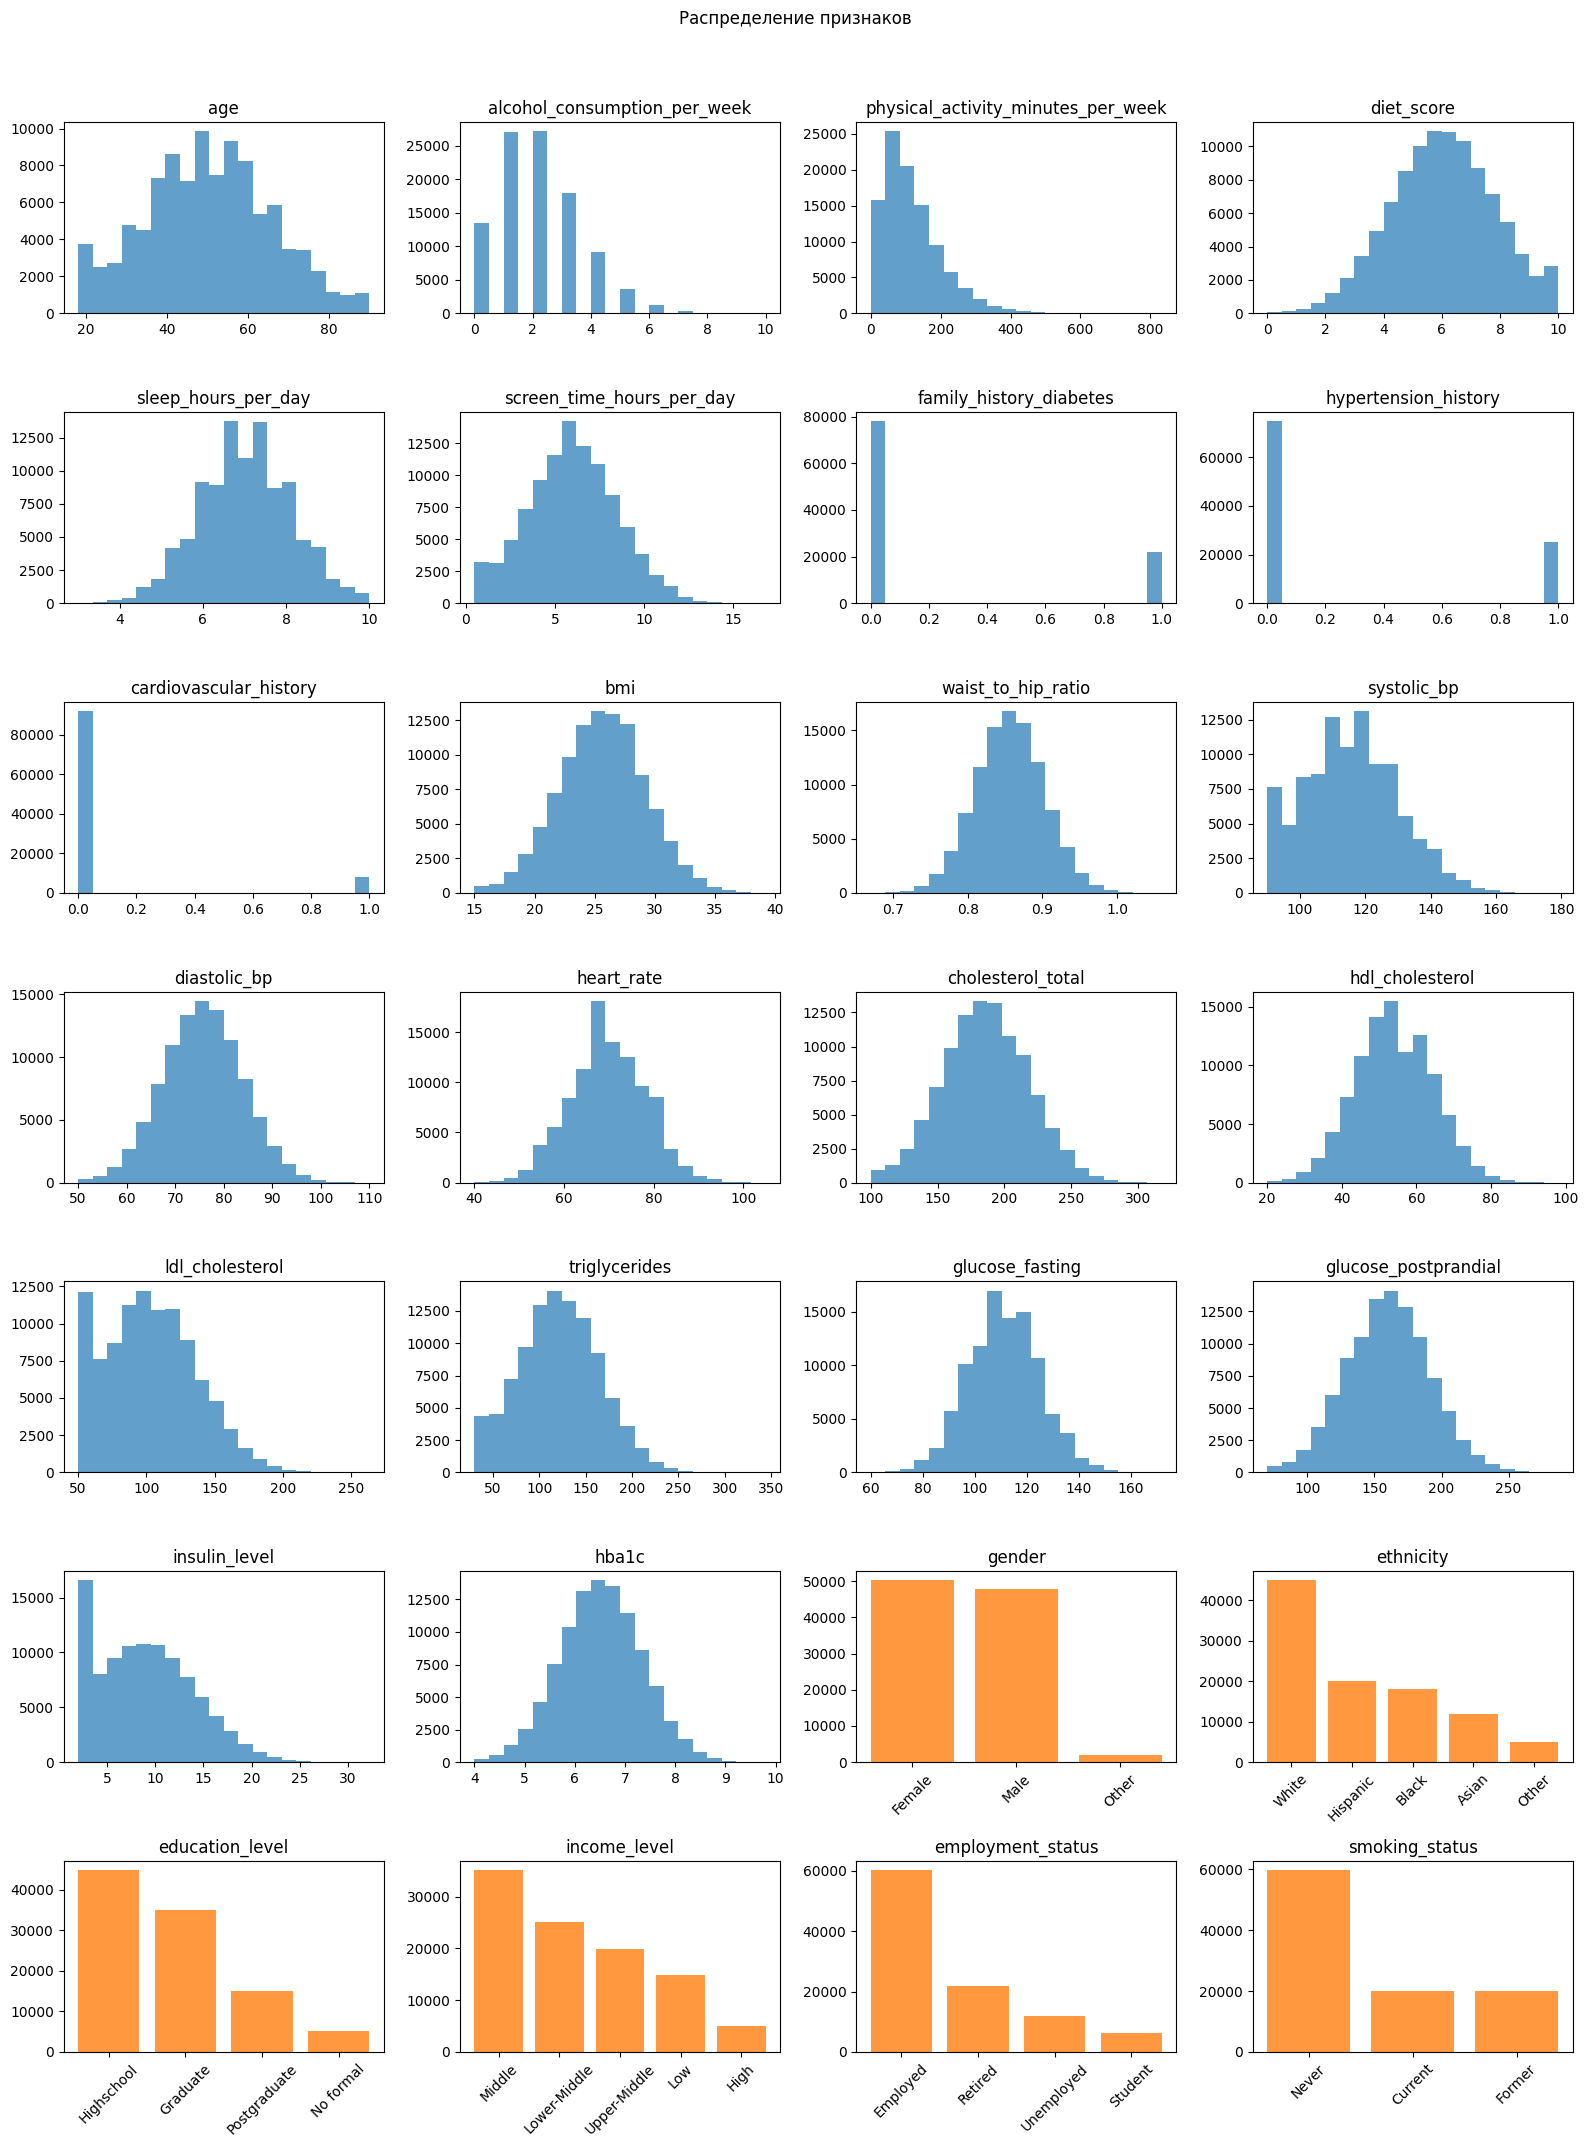

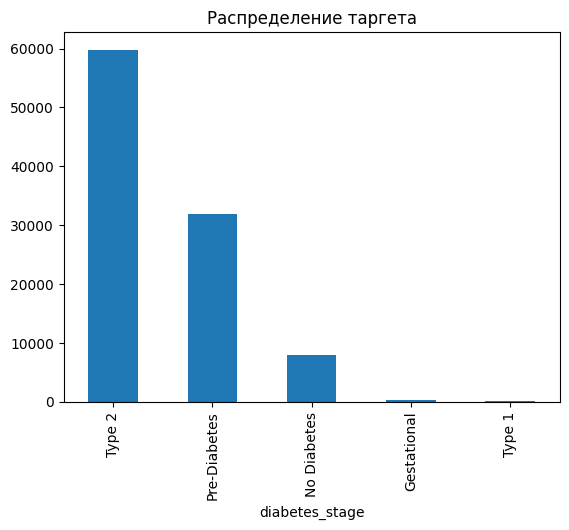

In [ ]:
print("Количество наблюдений:", X.shape[0])
print("Количество признаков:", X.shape[1])
print("Пропущенные значения по признакам:\n", X.isnull().sum())

cat_cols = X.select_dtypes(include='object').columns.tolist()
print("Количество категориальных признаков:", len(cat_cols))
print("Категориальные признаки:", cat_cols)

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

all_cols = num_cols + cat_cols
n = len(all_cols)
cols = 4
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(X[col].dropna(), bins=20, color='C0', alpha=0.7)
    axes[i].set_title(col)

for j, col in enumerate(cat_cols, start=len(num_cols)):
    ax = axes[j]
    vc = X[col].value_counts()
    ax.bar(vc.index.astype(str), vc.values, color='C1', alpha=0.8)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

for k in range(n, len(axes)):
    fig.delaxes(axes[k])

plt.suptitle("Распределение признаков", y=1.02)
plt.tight_layout()
plt.show()

y.value_counts().plot(kind='bar')
plt.title("Распределение таргета")
plt.show()

In [9]:
object_cols = X.select_dtypes(include='object').columns
X_dummy = pd.get_dummies(X, columns=object_cols, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=0)


Accuracy полного дерева: 0.8589
Accuracy дерева глубины 3: 0.91815


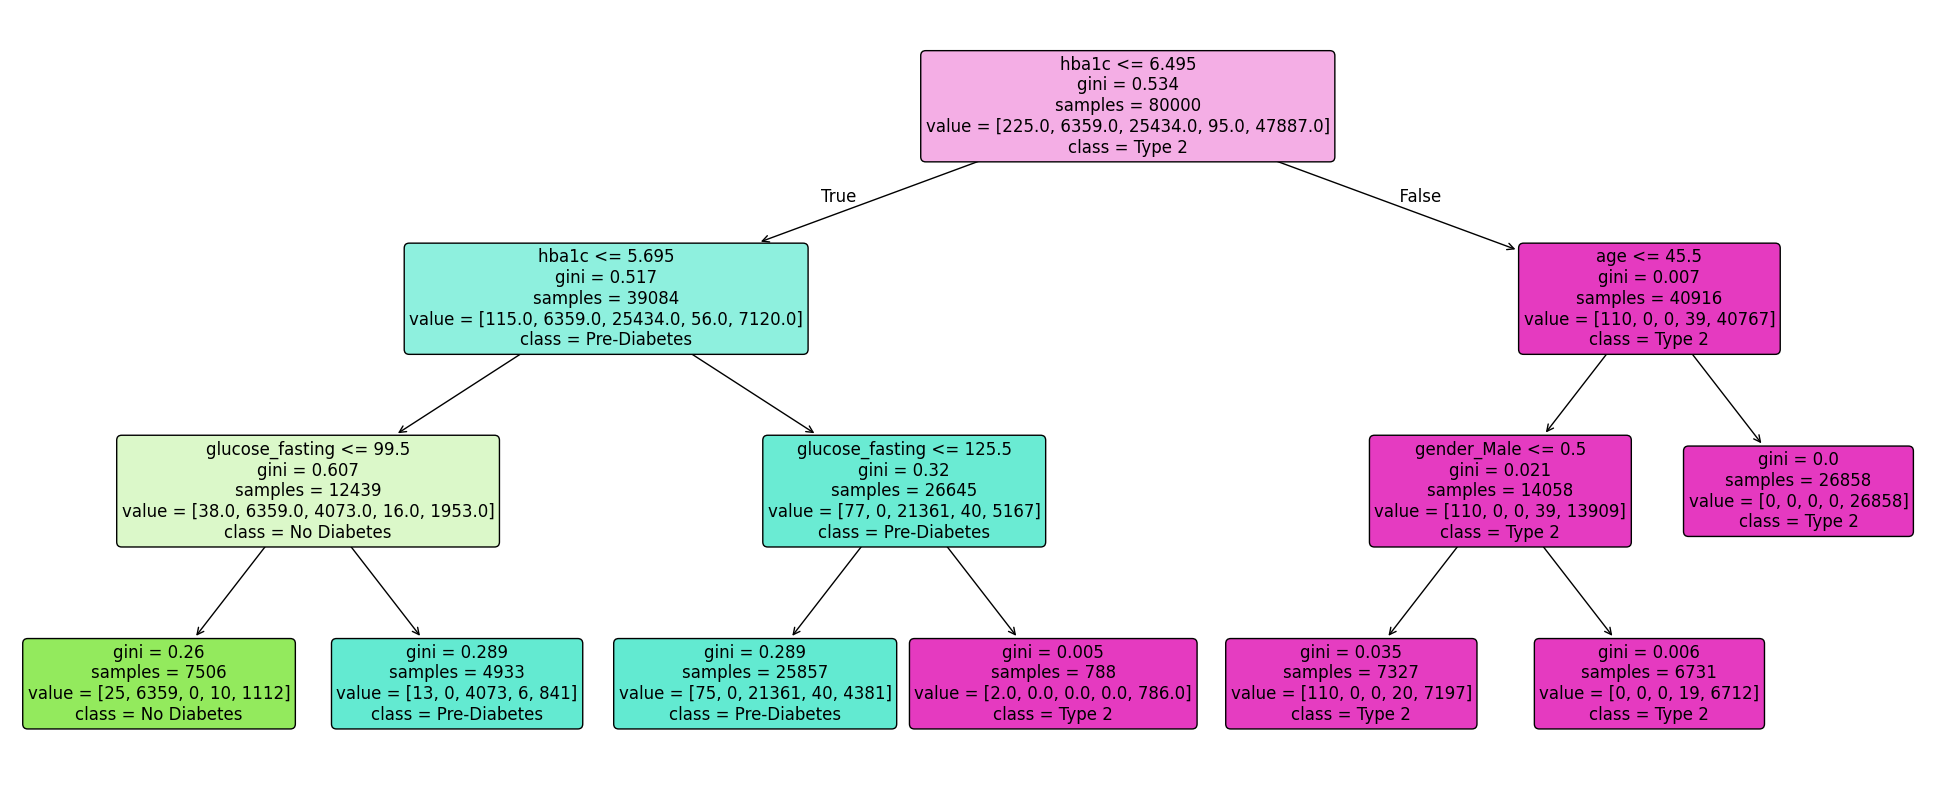

In [ ]:
tree_full = DecisionTreeClassifier(random_state=0)
tree_full.fit(X_train, y_train)
y_pred_full = tree_full.predict(X_test)
print("Accuracy полного дерева:", accuracy_score(y_test, y_pred_full))

tree_small = DecisionTreeClassifier(
    max_depth=3, 
    random_state=0, 
    # min_impurity_decrease=0.001
    )
tree_small.fit(X_train, y_train)
y_pred_small = tree_small.predict(X_test)
print("Accuracy дерева глубины 3:", accuracy_score(y_test, y_pred_small))

plt.figure(figsize=(25, 10))
plot_tree(tree_small, feature_names=X_train.columns.tolist(), class_names=sorted(y.unique()), filled=True, rounded=True, fontsize=12)
plt.show()

Вывод: наиболее сильный вклад дает признак hba1c, по нему идет первичное разделение. Правая ветвь с Type 2 классом наиболее чистая. Точность полного дерева меньше дерева с ограниченной глубиной, значит происходит переобучение. 

# Задание 2

Построить зависимость качества решения (на обучении и скользящем контроле) от числа листьев дерева. Рассмотреть разные критерии ветвления (желательно все графики поместить на один рисунок);

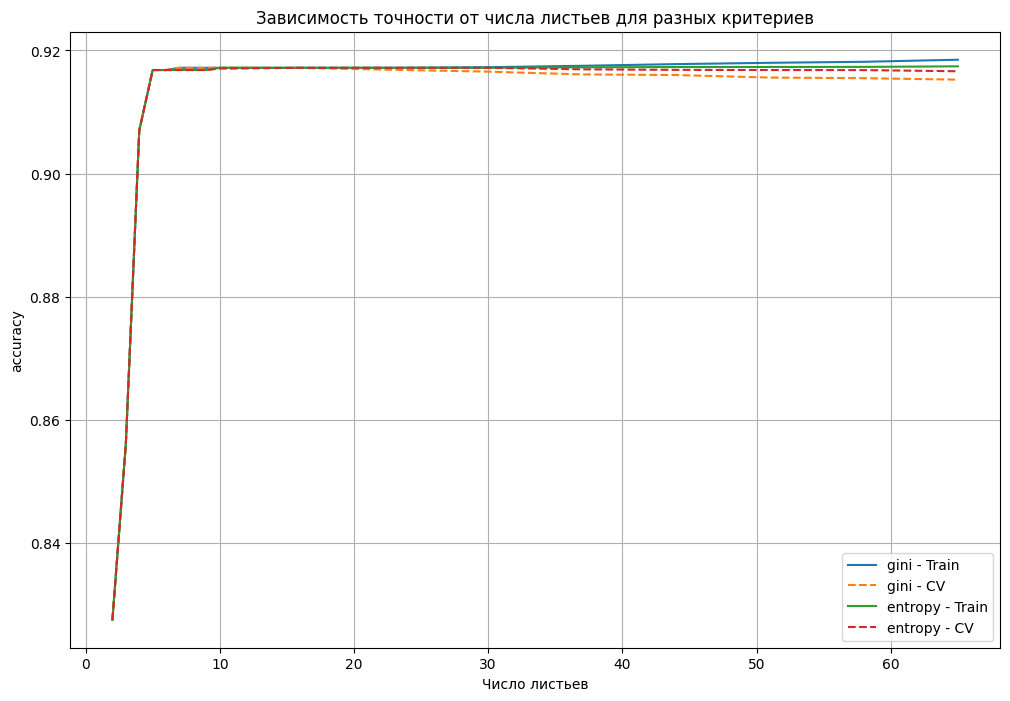

In [13]:
leaf_nodes_range = np.concatenate([np.arange(2, 12, 1)] + [np.arange(16, 70, 7)])
criteria = ['gini', 'entropy']

fig, ax = plt.subplots(figsize=(12, 8))
for criterion in criteria:
    train_acc = []
    cv_acc = []

    for max_leaves in leaf_nodes_range:
        tree = DecisionTreeClassifier(
            criterion=criterion,
            max_leaf_nodes=max_leaves,
            random_state=42
        )
        tree.fit(X_train, y_train)

        train_acc.append(accuracy_score(y_train, tree.predict(X_train)))

        cv_scores = cross_val_score(
            tree, X_train, y_train, n_jobs=-1
        )
        cv_acc.append(cv_scores.mean())

    ax.plot(leaf_nodes_range, train_acc, label=f'{criterion} - Train')
    ax.plot(leaf_nodes_range, cv_acc, label=f'{criterion} - CV', linestyle='--')

ax.set_xlabel('Число листьев')
ax.set_ylabel('accuracy')
ax.set_title('Зависимость точности от числа листьев для разных критериев')
ax.legend()
ax.grid(True)
plt.show()

Вывод: Наиболее точными являются деревья с кол-вом листьев 5-20, с увеличением числа листьев точность падает за счет переобучения модели. При этом переобучение происходит быстрее по критерию gini.

# Задание 3
Применить модель градиентного бустинга (можно взять любой). Вычислить и визуализировать значимость признаков. Визуализировать первые 3 дерева бустинга;

Accuracy градиентного бустинга: 0.91835


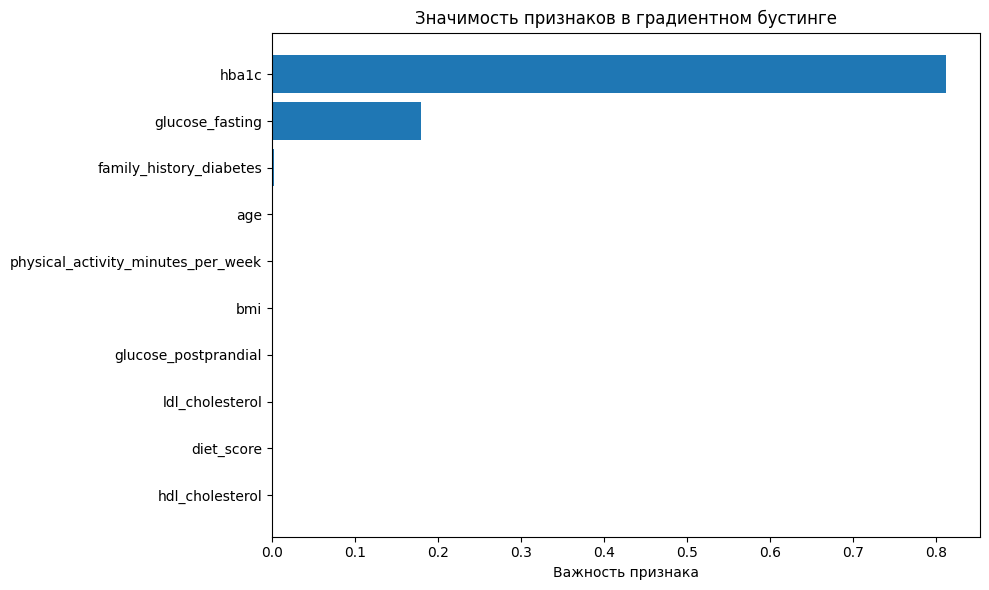

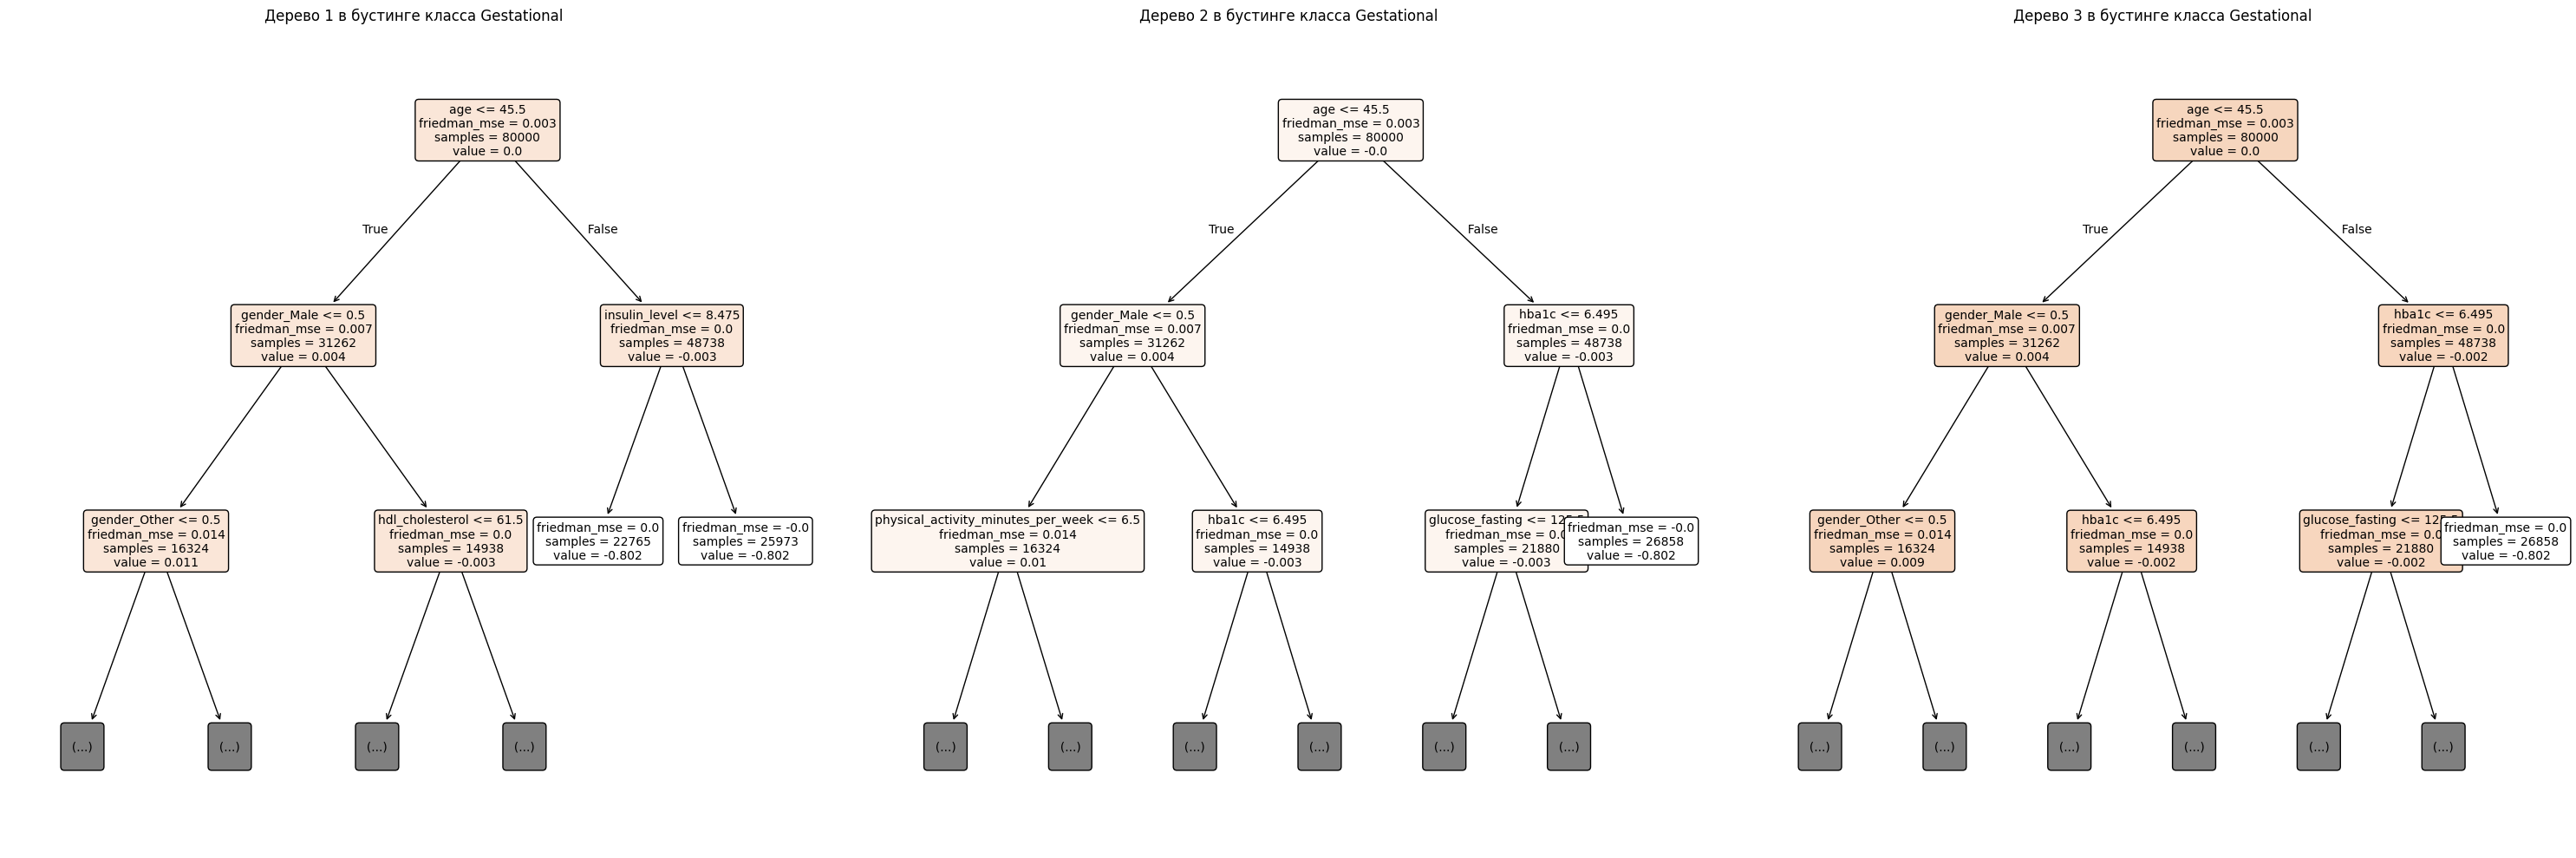

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=0, n_estimators=50)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print("Accuracy градиентного бустинга:", accuracy_score(y_test, y_pred_gb))

importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]  

top_n = min(10, len(importances))
plt.figure(figsize=(10, 6))
plt.title("Значимость признаков в градиентном бустинге")
plt.barh(range(top_n), importances[indices[:top_n]])
plt.yticks(range(top_n), [X_train.columns[i] for i in indices[:top_n]])
plt.xlabel("Важность признака")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
for i in range(3):
    tree = gb_model.estimators_[i][0]
    plot_tree(tree, feature_names=X_train.columns.tolist(),
              class_names=sorted(y.unique()), filled=True, rounded=True,
              fontsize=10, ax=axes[i], max_depth=2)
    axes[i].set_title(f"Дерево {i+1} в бустинге класса {gb_model.classes_[0]}")

plt.tight_layout()
plt.show()

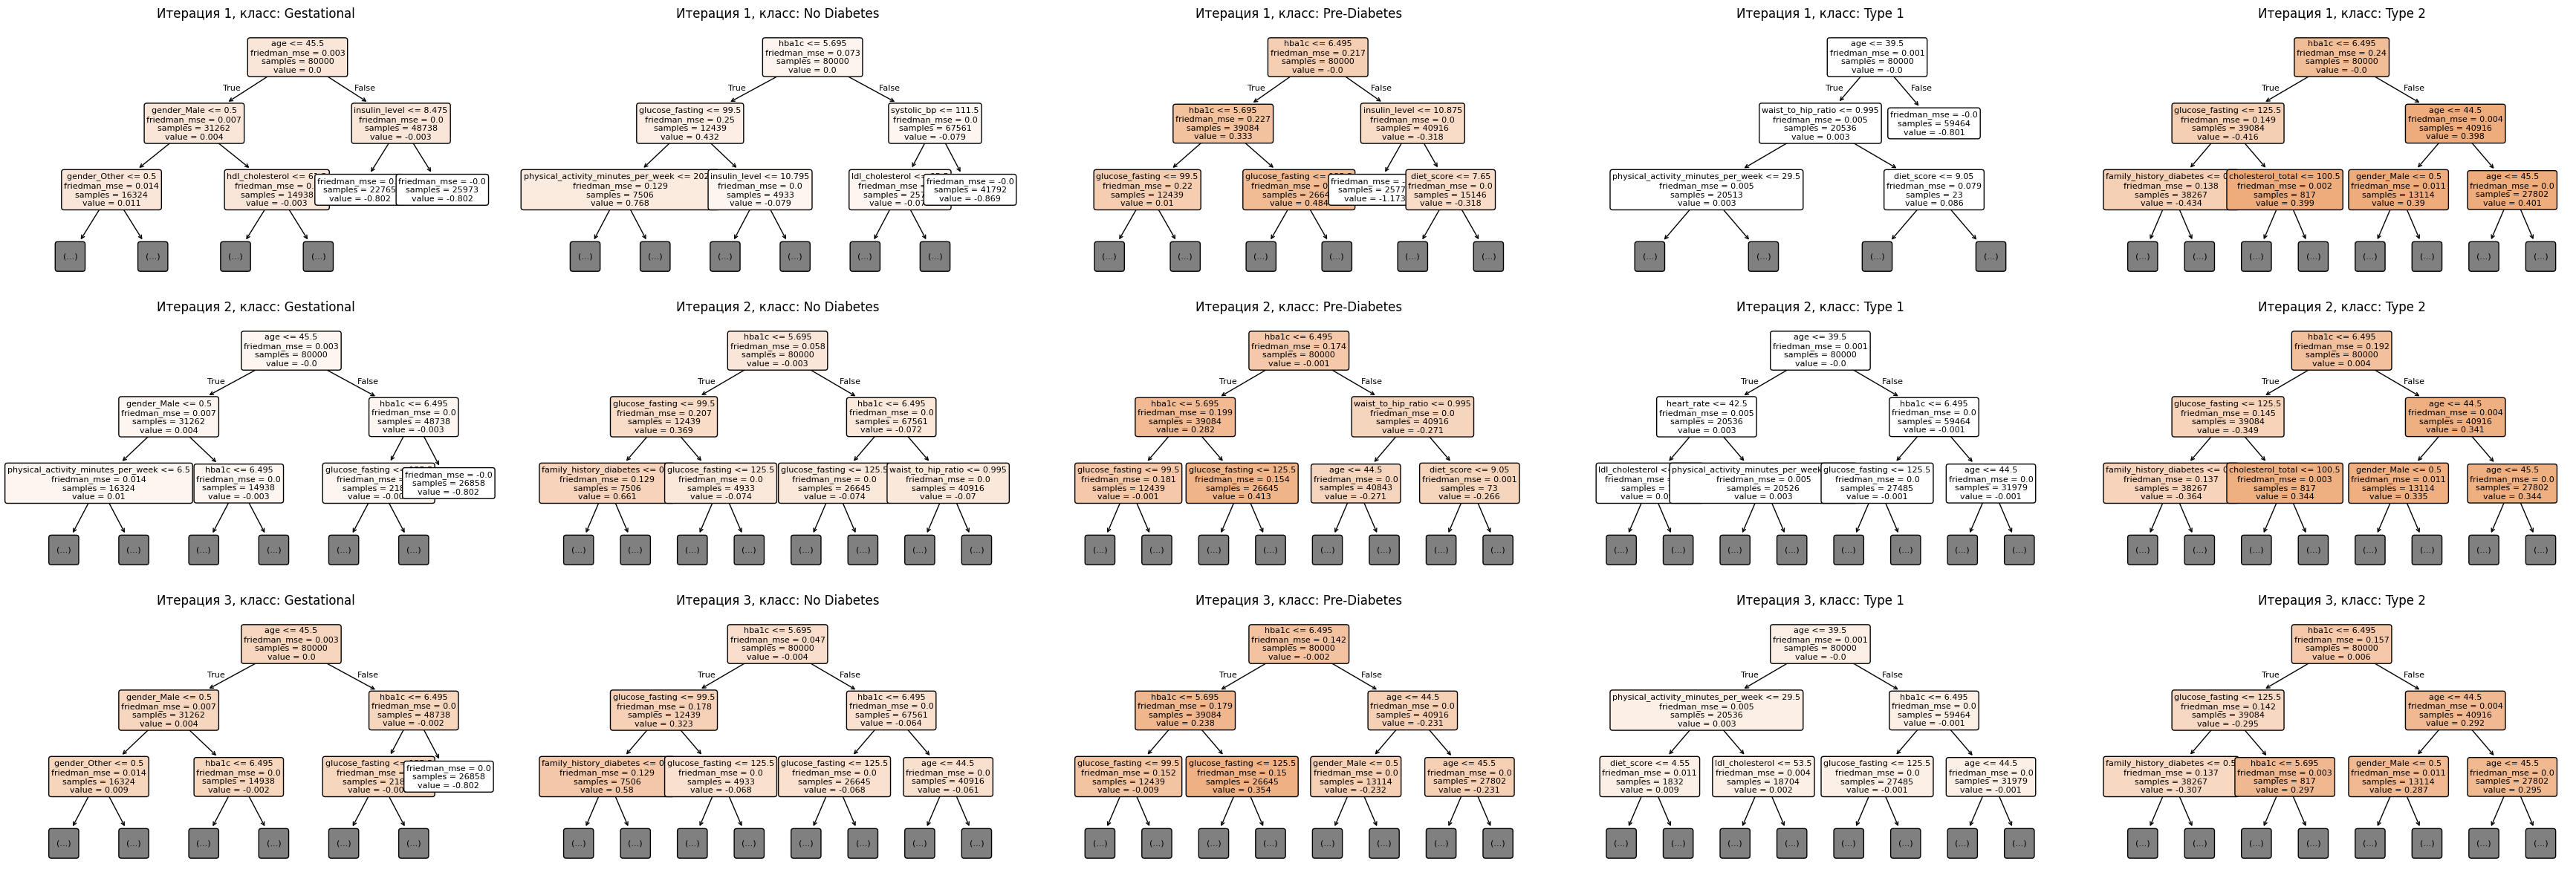

In [12]:

n_trees_to_show = 3  
n_classes = len(gb_model.classes_)

fig, axes = plt.subplots(
    n_trees_to_show, n_classes, figsize=(7 * n_classes, 4 * n_trees_to_show)
)

# axes = np.atleast_2d(axes)

for i in range(n_trees_to_show):  
    for k, cls in enumerate(gb_model.classes_):  
        tree = gb_model.estimators_[i][k]
        ax = axes[i, k]

        plot_tree(
            tree,
            feature_names=X_train.columns.tolist(),
            filled=True,
            rounded=True,
            fontsize=8,
            max_depth=2,
            ax=ax
        )

        ax.set_title(f"Итерация {i+1}, класс: {cls}")

plt.tight_layout()
plt.show()

Вывод: признак hba1c является наиболее значимым, все остальные (за исключением glucose_fasting) имеют очень низкую значимость. 

# Задание 4
Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.

In [14]:
from sklearn.utils import resample  

X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=int(0.2 * len(X_train)), random_state=0, stratify=y_train)
print(len(X_train_sub))

16000


2 3 4 5 6 7 8 9 10 20 30 40 50 60 70 

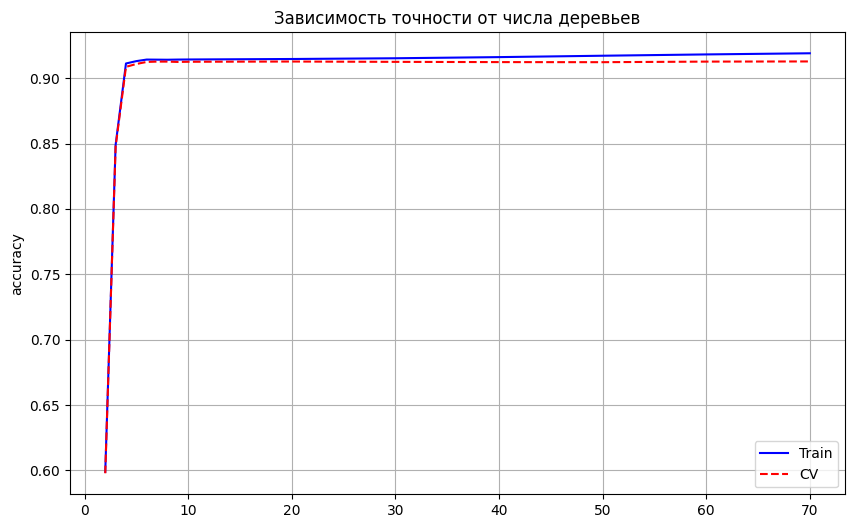

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_range = np.concatenate([np.arange(2, 10, 1)] + [np.arange(10, 80, 10)])

train_acc = []
cv_acc = []

for n_est in n_estimators_range:
    print(n_est, end=' ')
    gb = GradientBoostingClassifier(n_estimators=n_est, random_state=0)
    gb.fit(X_train_sub, y_train_sub)  
    
    train_acc.append(accuracy_score(y_train_sub, gb.predict(X_train_sub)))
    
    cv_scores = cross_val_score(gb, X_train_sub, y_train_sub, cv=5, n_jobs=-1)
    cv_acc.append(cv_scores.mean())
    
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_acc, label='Train', color='blue')
plt.plot(n_estimators_range, cv_acc, label='CV', color='red', linestyle='--')
plt.ylabel('accuracy')
plt.title('Зависимость точности от числа деревьев')
plt.legend()
plt.grid(True)
plt.show()

Вывод: увеличение числа деревьев в градиентном бустинге не приводит к переобучению (точность растет для тренировочных данных, но не уменьшается для других), но роста точности на произвольных данных также не наблюдается.

# Задание 5 
Выполнить пункт 3-4 для модели случайного леса. 

Accuracy случайного леса: 0.9184


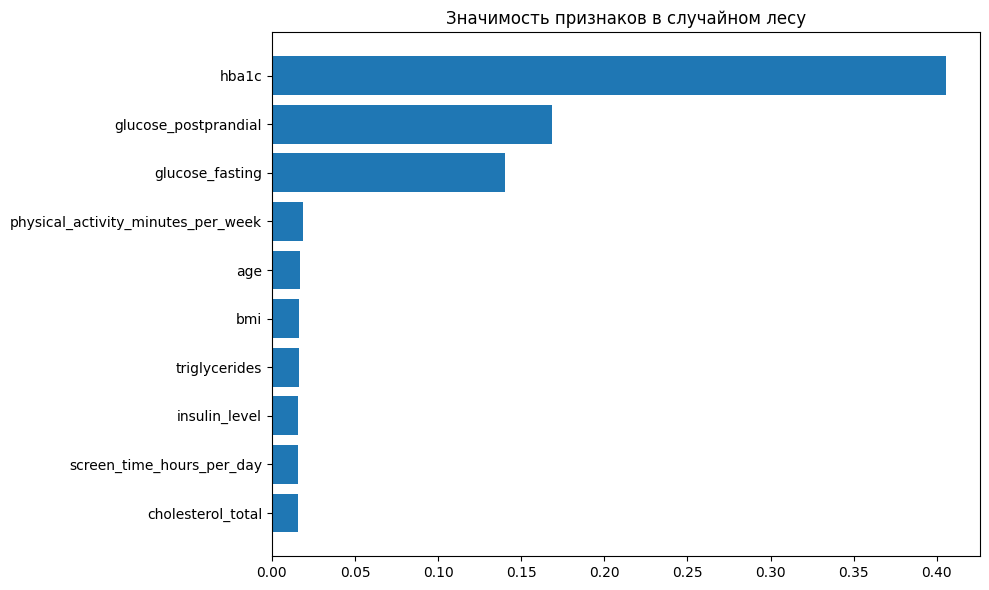

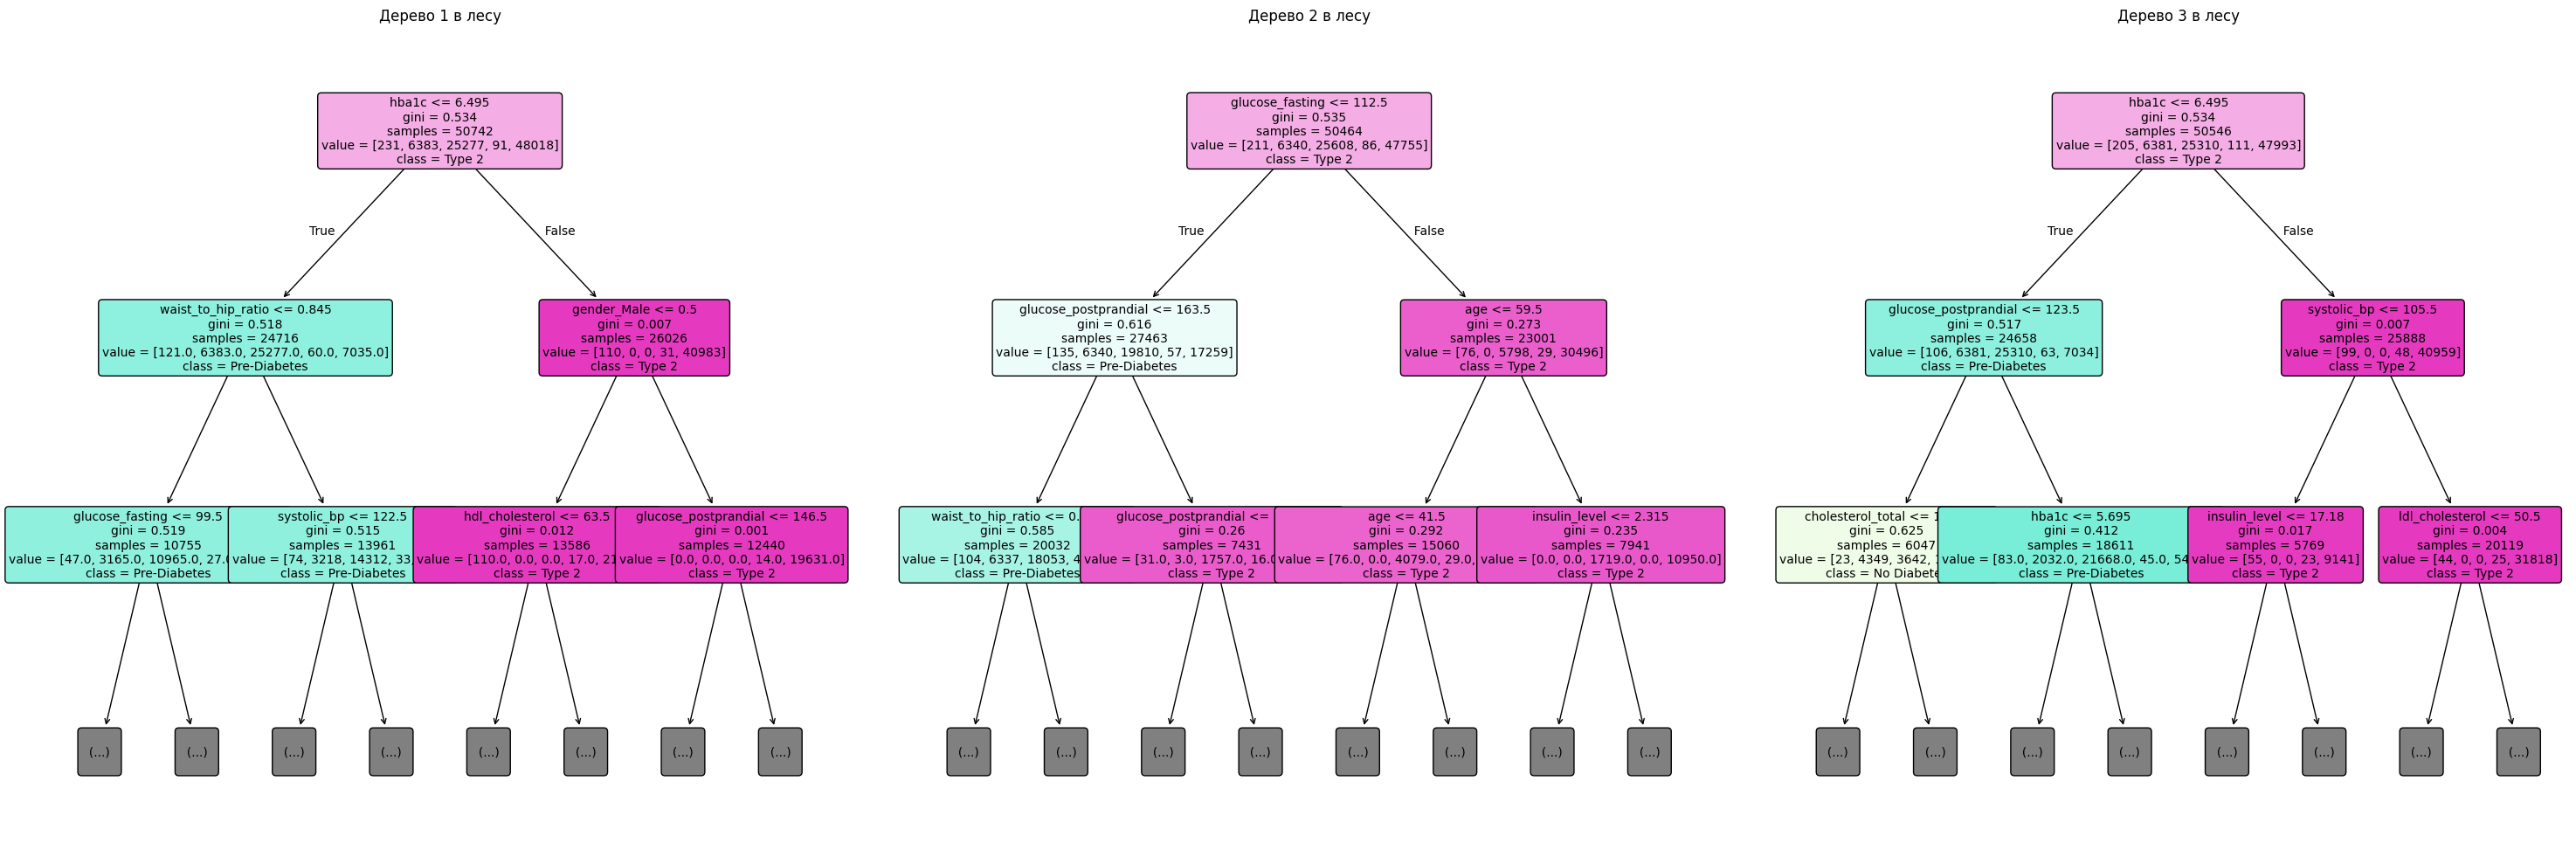

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)  
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Accuracy случайного леса:", accuracy_score(y_test, y_pred_rf))

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = min(10, len(importances))
plt.figure(figsize=(10, 6))
plt.title("Значимость признаков в случайном лесу")
plt.barh(range(top_n), importances[indices[:top_n]])
plt.yticks(range(top_n), [X_train.columns[i] for i in indices[:top_n]])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
for i in range(3):
    tree = rf_model.estimators_[i]  
    plot_tree(tree, feature_names=X_train.columns.tolist(), 
              class_names=sorted(y.unique()), filled=True, rounded=True, 
              fontsize=10, ax=axes[i], max_depth=2)
    axes[i].set_title(f"Дерево {i+1} в лесу")

plt.tight_layout()
plt.show()

Вывод: По сравнению с градиентным бустингом увеличилась значимость признаков, кроме hba1c, причем заметнее всего выросла значимость glucose_postprandial.

1 2 3 4 5 6 7 8 9 10 25 40 55 70 85 

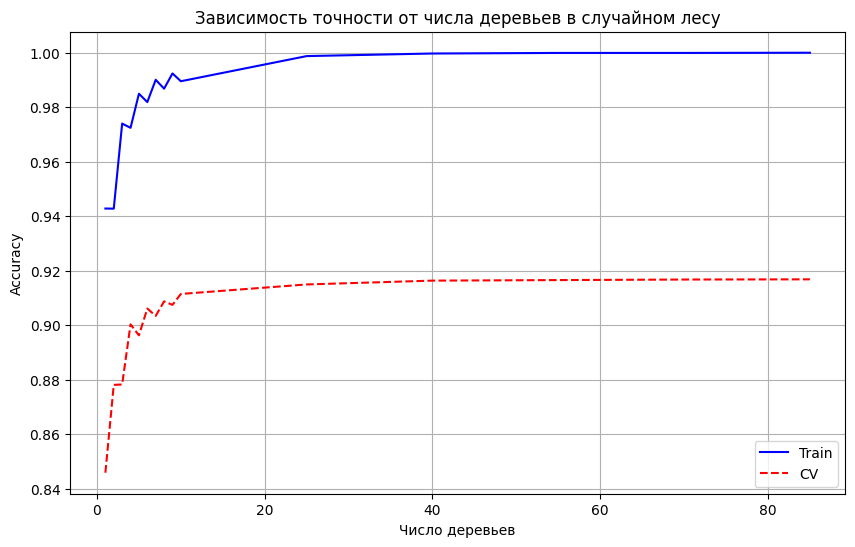

In [42]:
n_estimators_range = np.concatenate([np.arange(1, 10, 1)] + [np.arange(10, 90, 15)])
train_acc = []
cv_acc = []

for n_est in n_estimators_range:
    print(n_est, end=' ')
    rf = RandomForestClassifier(n_estimators=n_est, random_state=0, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train, rf.predict(X_train)))
    
    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)
    cv_acc.append(cv_scores.mean())
    
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_acc, label='Train', color='blue')
plt.plot(n_estimators_range, cv_acc, label='CV', color='red', linestyle='--')
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.title('Зависимость точности от числа деревьев в случайном лесу')
plt.legend()
plt.grid(True)
plt.show()

Вывод: увеличение числа деревьев не ведет к переобучению случайного леса. Оптимальным кол-вом деревьев является значение от 60 до 80.

1 2 3 4 5 6 7 8 9 10 20 30 

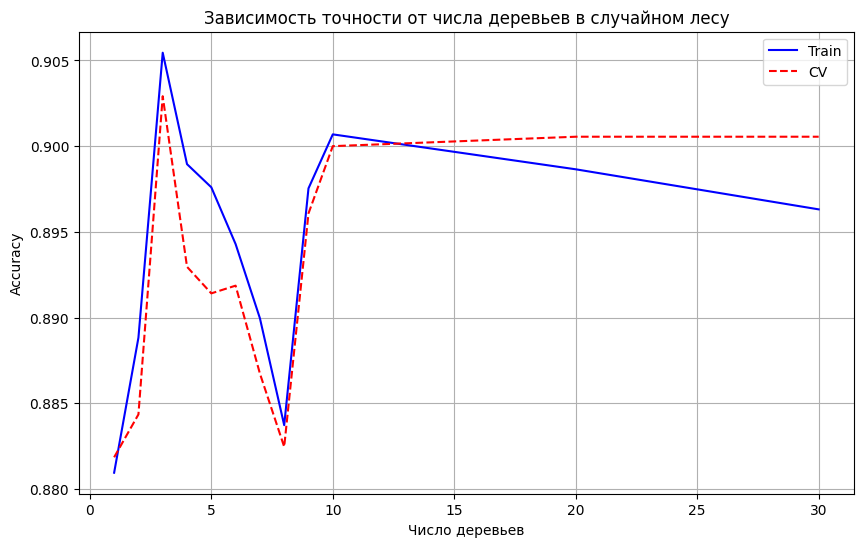

In [22]:
n_estimators_range = np.concatenate([np.arange(1, 10, 1)] + [np.arange(10, 40, 10)])
train_acc = []
cv_acc = []

for n_est in n_estimators_range:
    print(n_est, end=' ')
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=6, random_state=0, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train, rf.predict(X_train)))
    
    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)
    cv_acc.append(cv_scores.mean())
    
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_acc, label='Train', color='blue')
plt.plot(n_estimators_range, cv_acc, label='CV', color='red', linestyle='--')
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.title('Зависимость точности от числа деревьев в случайном лесу')
plt.legend()
plt.grid(True)
plt.show()